In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Moving Average Smoothing

Moving average smoothing is a naive and effective technique in time series forecasting. It can be used for data preparation, feature engineering, and even directly for making predictions. 

Smoothing is the technique used to remove the fine-grained variation between time steps. The goal of smmoothing is to remove noise and better expose the signal of the underlying causal process. 

Calculating a moving average involves creating a new series where the values are comprised of the average of raw observations in the original time series.

A moving average requires specifying a window size, which is called window width. Window width defiens the number of raw observations used to calculate the moving average value. The moving part in the moving average refers to the fact that the window defined by the window width is slid along the time series to calcuate the average values in the new series. 

There are two main types of moving average: 

1. Centerned moving average
2. Trailling moving average

center-ma(t) = mean(obs(t-1), obs(t), obs(t+1))

This method requires knowledge of future values, and as such is used on time series analysis to better understand the dataset. A center moving average can be used as a general method to remove trend and seasonal components from a time series. 

trial_ma(t) = mean(abs(obs(t-2), obs(t-1), obs(t))

Trailling moving average only uses histofical observations and is used on time series forecasting.

Date
1959-01-01          NaN
1959-01-02          NaN
1959-01-03    32.333333
1959-01-04    31.000000
1959-01-05    35.000000
1959-01-06    34.666667
1959-01-07    39.333333
1959-01-08    39.000000
1959-01-09    42.000000
1959-01-10    36.000000
Name: Births, dtype: float64


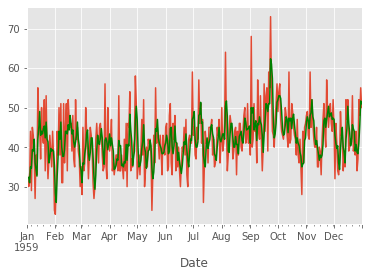

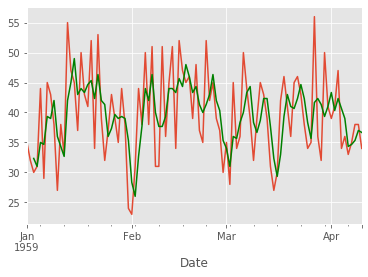

In [4]:
series = pd.read_csv('daily-total-female-births.csv',
                    header=0,
                    index_col=0,
                    parse_dates=True,
                    squeeze=True)

rolling = series.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))

series.plot()
rolling_mean.plot(color='green')
plt.show()

series[:100].plot()
rolling_mean[:100].plot(color='green')
plt.show()

In [15]:
series = pd.read_csv('daily-total-female-births.csv',
                    header=0,
                    index_col=0,
                    parse_dates=True,
                    squeeze=True)

df = pd.DataFrame(series.values)
width = 3
lag1 = df.shift(1)
lag3 = df.shift(width-1)
window = lag3.rolling(window=width)
means = window.mean()

df = pd.concat([means, lag1, df], axis=1)
df.columns = ['mean', 't', 't+1']

print(df.head(10))


        mean     t  t+1
0        NaN   NaN   35
1        NaN  35.0   32
2        NaN  32.0   30
3        NaN  30.0   31
4  32.333333  31.0   44
5  31.000000  44.0   29
6  35.000000  29.0   45
7  34.666667  45.0   43
8  39.333333  43.0   38
9  39.000000  38.0   27


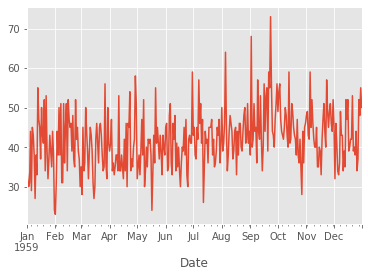

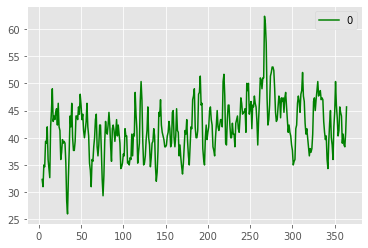

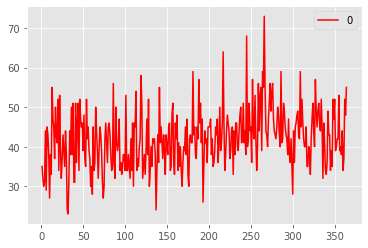

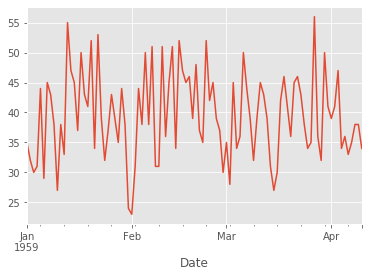

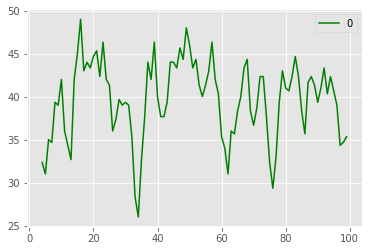

In [16]:
series.plot()
means.plot(color='green')
lag1.plot(color='red')
plt.show()

series[:100].plot()
means[:100].plot(color='green')
plt.show()

## White Noise

A time series is white noise when the variables are independent and identically distributed with a mean of zero. This means all the variables have the same variance (sigma**2) and each value as a zero correlation with all other values in the series.

White noise is an important concept in time series:
1. Predictability: if a time series is white noise, then it is random, we cannot reasonably model it and make predictions.
2. Model diagnostics: the series of erros from a time series forecast model should idealy be white noise. Time series data are expected to contain some white noise componant on top of the signal generated by the underlying process.

    y(t) = signal(t) + noise(t)

Once predicitons have been made by a time series forecast model, they can be collected and analyzed. The series of forecast errors should ideally be white noise. When forecast errors are white noise, it means that all of the signal information in the time series has been harnessed by the model in order to make predicitons. All that left is random fluctuations that cannot be modeled.

### Check if time series is white noise:

1. have a non-zero mean?
2. variance change over time?
3. values correlate with lag values?


Tools to check white noise:

1. create a line plot
2. calculate summary statistics
3. create an autocorrelation plot.

## Random Walk

Random walk helps understand the predictability of your time series forecast problem.


In [8]:
from random import seed
from random import randrange

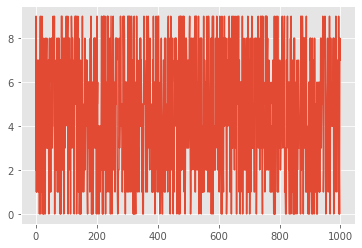

In [9]:
seed(1)
series = [randrange(10) for i in range(1000)]
plt.plot(series)
plt.show()

This is not random walk, this is white noise.

Randome walk is different from a list of random numbers, because the next value in the sequence is a modification of the previous value in the sequence. The process used to generate the series forces dependence from one-time steo to the enxt. This dependence provides some consistency from step to steo rather than the large jumps that a series of indeoendent, random numbers provides.

A simple model of random walk is :
1. start with a random number of either -1 or 1.
2. Randomly select a -1 or 1 and add it to the observation from the previous time step. 
3. Repeat step2 for as long as you like. 

y(t) = B0 + B1 * X(t-1) + e(t)

Becasue randome walk is constructed and the observations in a random walk are dependent on time. The current observation is a random step from the previous observation. Therefore,, all random walk processes are non-stationarity. 

Nevertheless, not all non-stationary series are random walk.

#### A radnom walk is unpredictable. It cannot reasonably be predicted.

A random walk is one in which future steps or directions cannot be predicted on the
basis of past history. When the term is applied to the stock market, it means that
short-run changes in stock prices are unpredictable.
— Page 26, A Random Walk Down Wall Street.

## Decomposition

#### Automatic time series decomposition

from statesmodels.tsa.seasonal import seasonal_decompose
series = ...
result = seasonal_decompose(series, model='additive')
print(result.trend, result.season, result.resid, result.observed)

result.plot()
plt.show()

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
from random import randrange

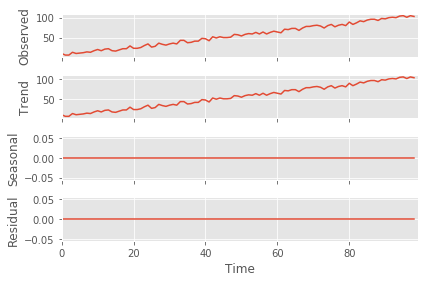

In [12]:
series = [i + randrange(10) for i in range(1, 100)]
result = seasonal_decompose(series, model='additive', freq=1)
result.plot()
plt.show()


The Residual plot shows zero, because the naive decomposition was not able to seperate the noise from the linear trend. 

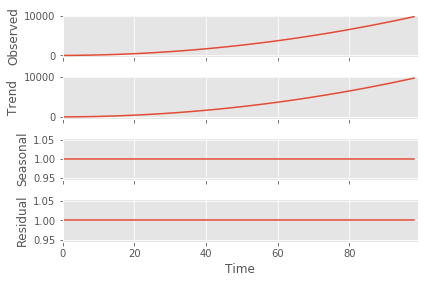

In [13]:
series = [i **2 for i in range(1, 100)]
result = seasonal_decompose(series, model='multiplicative', freq=1)
result.plot()
plt.show()

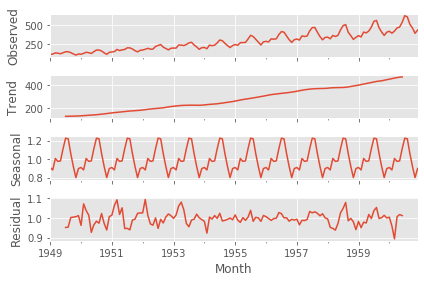

In [16]:
series = pd.read_csv('airline-passengers.csv',
                    header=0,
                    index_col=0,
                    parse_dates=True,
                    squeeze=True)
result = seasonal_decompose(series, model='multiplicative')
result.plot()
plt.show()

## Trend

A systmatic change in a time series that does not appear to be periodic is known as trend. 

faster modeling: the knowledge of a trend or lack of a trend
simpler problem: correct or remove the trend to simplify the modeling
more data: provide additional information using the trend information to improve the model performance.

### types of trends
1. deterministic trends: consistently increase or decrease
2. stochastic trends: increase and decrease inconsistently
3. global trends: apply to the whole time series
4. local trends: apply to parts of subsequences of a time series.


### detrend by differencing:

value(t) = observation(t) - observation(t-1)

In [19]:
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

series = pd.read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True,
                 squeeze=True, date_parser=parser)

/Users/daihongchen/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


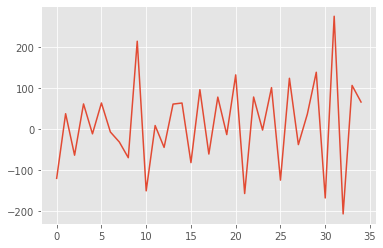

In [20]:
X = series.values
diff = list()

for i in range(1, len(X)):
    value = X[i] - X[i-1]
    diff.append(value)
plt.plot(diff)
plt.show()

### detrend by model fitting:
value(t) = observation(t) - prediction(t)

/Users/daihongchen/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  after removing the cwd from sys.path.


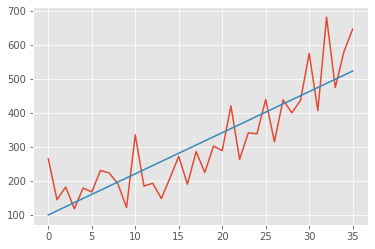

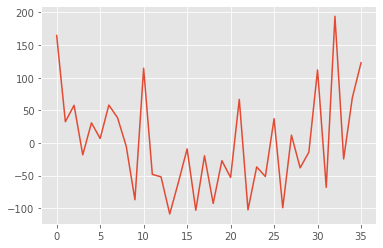

In [26]:
from sklearn.linear_model import LinearRegression

def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

series = pd.read_csv('shampoo-sales.csv',
                 header=0,
                 index_col=0,
                 parse_dates=True,
                 squeeze=True,
                 date_parser=parser)

from sklearn.linear_model import LinearRegression

X = [i for i in range(0, len(series))]
X = np.reshape(X, (len(X), 1))
y = series.values

model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)
plt.plot(y)
plt.plot(trend)
plt.show()

detrend = [y[i] - trend[i]for i in range(0, len(series))]
plt.plot(detrend)
plt.show()

## Remove seasonality

a repeating pattern within a fixed period is known as seasonal variation. 
types of seasonality:
1. times of day
2. daily
3. weekly
4. monthly
5. yearly

Once seasonality is identified, can be removed, which is called seasonal adjustment, or deseasonalizing. A time series with a seasonal component removed called seasonal stationary. a time series with a clear seasonal component is refered to as non-stationary.

### Seasonal adjustment with differencing

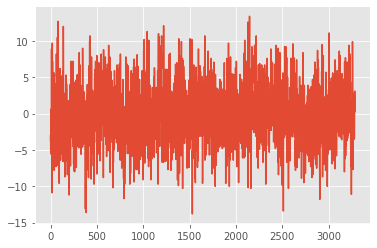

In [29]:
series = pd.read_csv('daily-minimum-temperatures.csv',
                    header=0,
                    index_col=0,
                    parse_dates=True,
                    squeeze=True)

X = series.values
days_in_year = 365
diff = list()
for i in range(days_in_year, len(X)):
    value = X[i] - X[i-days_in_year]
    diff.append(value)
plt.plot(diff)
plt.show()

In [30]:
from statsmodels.graphics.tsaplots import plot_acf

In [32]:
series = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

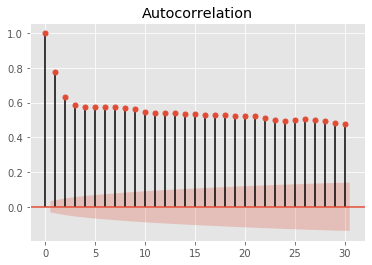

In [33]:
plot_acf(series, lags=30)
plt.show()

# ARIMA: Autoregressive Integrated Moving Average Model

AR: Autoregression. A model uses the dependent relationship between an observation and some number of lagged observations.

I: Integrated. The use of differencing of raw observations (eg, value(t)-value(t-1) in order to make the time series stationary.

MA: Moving Average. A model that uses the depnedency between an observation and a residual error from a moving average model applied to lagged observations.

### Parameters of ARIMA:
p: the oder of the lag. The number of lag observations included in the model. Lag order.

d: the number of steps needed for differencing to make the series statioanry, also called degree of differecing. 

q: The size of the moving average window, also called the order of moving average.

# Long Short Term Memory Neural Networks

## Backpropagation training algorithm
Mathmatical methods used to calculate derivatives and an application of the derivative chain rule. 

The training algorithm for updating network weights to minimize error.

The goal of the backpropagation training algorithm is to modify the weights of a neaural network in order to minimize the error of the network putputs compared to some epxected output in response to corresponding inputs. It is a supervised learning algorithm that allows the network to be corrected with rgard to the speific error made. 
1. Present a training pattern and propagate it through the network to get an output.
2. Compare the predicted outputs to the expected outputs and calculate the error.
3. Calculate the derivatives of the error with respect to the network weights.
4. Adjust the weights to minimize the error.
5. Repeat. 

RNNs, once unfolded in time, can be seen as very deep feedforward networks in which all the layers share the same weights. 

As the network is unfolded over time, the connections arrive at layers are viewed as coming from the previous timestep.

Importantly, the backpropogation of error for a given time step depends on the activation of the network at the prior time step. In this way, the backward pass requires the conceptulization of unfolding the network. Error is propagated back to the first input time step of the sequence so that the error gradient can be calculated and the weights of the network can be updated. 

Backpropagation through time:
1. present a sequence of time steps of input and output pairs to the network.
2. Unroll the network then calculate and accumulate errors across each time step.
3. Roll-up the network and update weights.
4. Repeat.

Deep learning libraries assume a vectorized representation of the dataset. In the case of variable length sequence prediction problems, this requires that your data be transformed such that each sequence has the same length. This vectorization allows code to efficiently perform the matrix operatios in batch for the chosen deep learning algorithms. 

The pad_sequences() function in Keras deep learning library can be used to pad variable length sequences. The default padding value is 0.0. 

The length of sequences can also be trimmed to a desried legnth. 

Reframe sequence data into supervised learning problems, with inout X, and output y.

In [34]:
from keras.preprocessing.sequence import pad_sequences

sequences=[[1,2,3,4], [1,2,3], [1]]

padded = pad_sequences(sequences)
padded_post = pad_sequences(sequences, padding='post')
truncated = pad_sequences(sequences, maxlen=2)

Using TensorFlow backend.


In [35]:
print(padded)
print()
print(padded_post)
print()
print(truncated)

[[1 2 3 4]
 [0 1 2 3]
 [0 0 0 1]]

[[1 2 3 4]
 [1 2 3 0]
 [1 0 0 0]]

[[3 4]
 [2 3]
 [0 1]]


## Define a LSTM model:
model = Sequential()
model.add(LSTM(2))
model.add(Dense(1)

or 

layers = [LSTM(2), Dense(1)]
model = Sequential(layers)

Input must be three-dimensional, comprised of samples, time steps, and features in that order.
1. Samples: rows in the data. 
2. Time steps: past observations for a feature, such as lag variables.
3. Features: columns in the data
